# Módulos Python

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from lazypredict.Supervised import LazyRegressor

# Extração - Carregar Base

## Arquivo Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Steel_industry_data.csv')
data = pd.read_csv('Steel_industry_data.csv')

# Tratamento

## Converter dados para formato numérico

In [ ]:
data['Usage_kWh'] = pd.to_numeric(data['Usage_kWh'])
data['Lagging_Current_Reactive.Power_kVarh'] = pd.to_numeric(data['Lagging_Current_Reactive.Power_kVarh'])
data['Leading_Current_Reactive_Power_kVarh'] = pd.to_numeric(data['Leading_Current_Reactive_Power_kVarh'])
data['CO2(tCO2)'] = pd.to_numeric(data['CO2(tCO2)'])
data['Lagging_Current_Power_Factor'] = pd.to_numeric(data['Lagging_Current_Power_Factor'])
data['Leading_Current_Power_Factor'] = pd.to_numeric(data['Leading_Current_Power_Factor'])
data['NSM'] = pd.to_numeric(data['NSM'])

## Usar datetime (tempo) com index dos dados do dataset

In [ ]:
data = data.set_index("date")
data.index = pd.to_datetime(data.index)

## Converter Dados Categóricos em dados Numerais

In [ ]:
data['WeekStatus'].replace(['Weekday', 'Weekend'], [0, 1], inplace=True)
data['Day_of_week'].replace(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], [0,1,2,3,4,5,6], inplace=True)
data['Load_Type'].replace(['Light_Load', 'Medium_Load', 'Maximum_Load'], [0,1,2], inplace=True)

## Apagar dados faltantes

In [ ]:
data = data.dropna()

# Data Visualization

## Correlação apenas do uso de Energia

In [ ]:
correlation_mat = data.corr()
correlation_Usage = correlation_mat['Usage_kWh'].sort_values(ascending=False)[1:]
correlation_Usage

CO2(tCO2)                               0.988180
Lagging_Current_Reactive.Power_kVarh    0.896150
Load_Type                               0.614570
Lagging_Current_Power_Factor            0.385960
Leading_Current_Power_Factor            0.353566
NSM                                     0.234610
Day_of_week                            -0.240705
WeekStatus                             -0.295475
Leading_Current_Reactive_Power_kVarh   -0.324922
Name: Usage_kWh, dtype: float64

<Axes: >

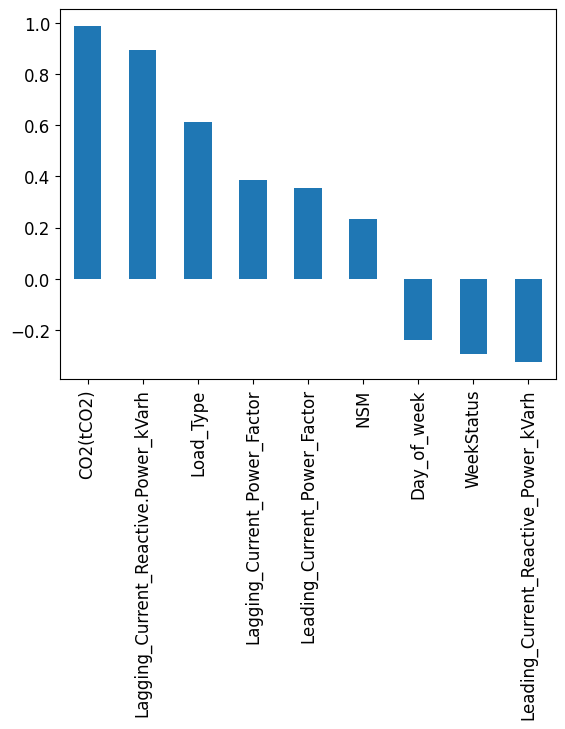

In [ ]:
correlation_Usage.plot(kind='bar', fontsize='12')

## Visulização do Consumo de Energia em Relação aos Outros Dados

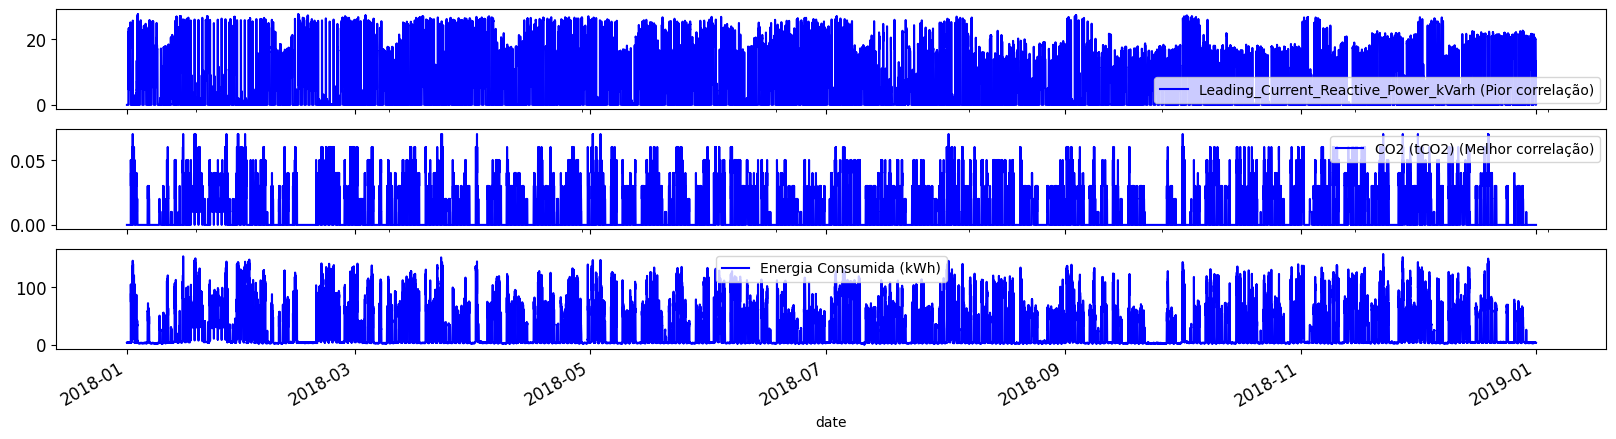

In [ ]:
hor_size = 20
ver_size = 5
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(hor_size, ver_size))
data['Leading_Current_Reactive_Power_kVarh'].plot(ax = axes[0], style = '-', color = 'blue', fontsize='12', sharex=True)
data['CO2(tCO2)'].plot(ax = axes[1], style = '-', color = 'blue', fontsize='12', sharex=True)
data['Usage_kWh'].plot(ax = axes[2], style = '-', color = 'blue', fontsize='12', sharex=True)
# plt.xlim(pd.to_datetime("2018-01"),pd.to_datetime("2018-07-15"))
axes[0].legend(['Leading_Current_Reactive_Power_kVarh (Pior correlação)'])
axes[1].legend(['CO2 (tCO2) (Melhor correlação)'])
axes[2].legend(['Energia Consumida (kWh)'])

## Boxplot

<Axes: xlabel='Usage_kWh'>

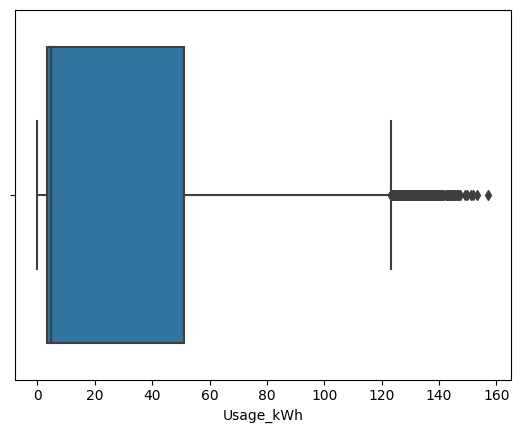

In [ ]:
sns.boxplot(x=data['Usage_kWh'])

# Dividir conjuntos para treinamento e testes

## Seleciona os 3 campos com melhor correlação

In [ ]:
melhores_correlacoes = correlation_Usage.index.values[:3]
melhores_correlacoes

array(['CO2(tCO2)', 'Lagging_Current_Reactive.Power_kVarh', 'Load_Type'],
      dtype=object)

In [ ]:
X = data[melhores_correlacoes]
y = data['Usage_kWh']
X = X.values
y = y.values
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10, shuffle = False)

## Visualiza dados de Treino e Teste

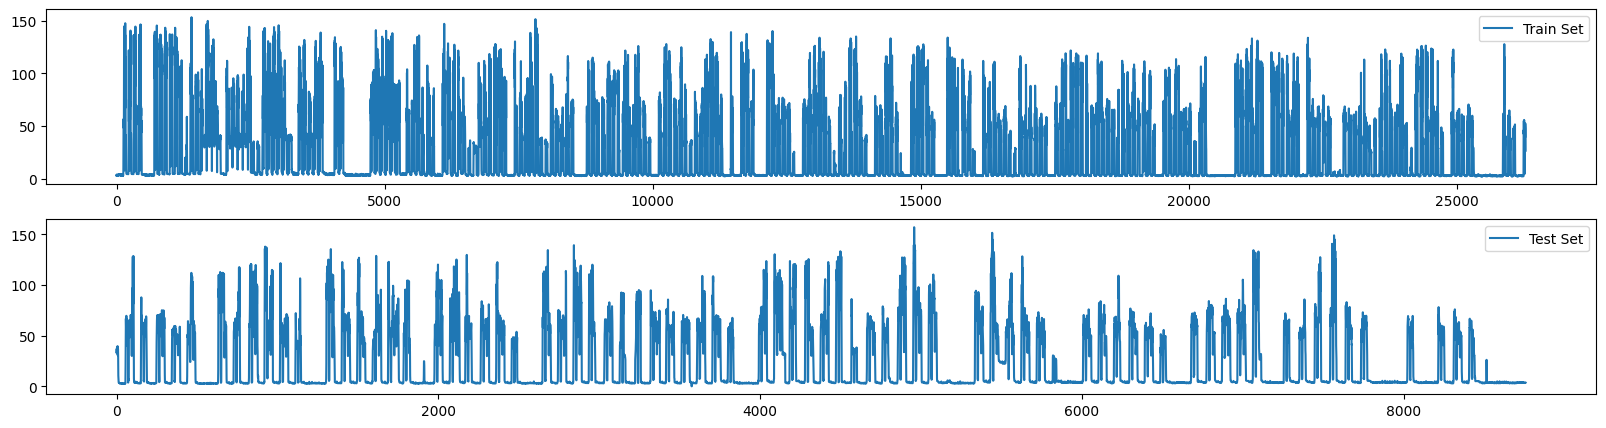

In [ ]:
hor_size = 20
ver_size = 5
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(hor_size, ver_size))
axes[0].plot(y_train)
axes[1].plot(y_test)
axes[0].legend(['Train Set'])
axes[1].legend(['Test Set'])

# Implementação dos Modelos de Aprendizado

### Modelos (Regressão Linear, SVR e Rede Neural)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor

modelos = [
  LinearRegression().fit(x_train, y_train),
  SVR().fit(x_train, y_train),
  MLPRegressor(random_state=1, max_iter=500, verbose=True).fit(x_train, y_train)
]

Iteration 1, loss = 487.08077393
Iteration 2, loss = 106.86366197
Iteration 3, loss = 98.60504770
Iteration 4, loss = 92.84423250
Iteration 5, loss = 88.94465564
Iteration 6, loss = 86.84305776
Iteration 7, loss = 85.65516064
Iteration 8, loss = 84.93338312
Iteration 9, loss = 84.30148039
Iteration 10, loss = 83.85329694
Iteration 11, loss = 83.21307893
Iteration 12, loss = 82.83058962
Iteration 13, loss = 82.41048496
Iteration 14, loss = 82.02054682
Iteration 15, loss = 81.73954526
Iteration 16, loss = 81.45972155
Iteration 17, loss = 80.98875080
Iteration 18, loss = 80.68582867
Iteration 19, loss = 80.31633936
Iteration 20, loss = 79.98887603
Iteration 21, loss = 79.72208290
Iteration 22, loss = 79.26629696
Iteration 23, loss = 78.86294530
Iteration 24, loss = 78.36376908
Iteration 25, loss = 77.93994776
Iteration 26, loss = 77.31786930
Iteration 27, loss = 76.91112602
Iteration 28, loss = 76.22986114
Iteration 29, loss = 75.70110550
Iteration 30, loss = 74.84343962
Iteration 31, los

### Predições e Métricas

In [ ]:
resultados = pd.DataFrame()
for modelo in modelos:
  resultado = {}
  resultado['Modelo'] = type(modelo).__name__

  # previsões dos dados de treino
  y_train_pred = modelo.predict(x_train)
  resultado['R2_Train'] = r2_score(y_train, y_train_pred)
  resultado['MSE_Train'] = mean_squared_error(y_train, y_train_pred)
  resultado['MAE_Train'] = mean_absolute_error(y_train, y_train_pred)

  # previsões dos dados de teste
  y_test_pred = modelo.predict(x_test)
  resultado['R2_Test'] = r2_score(y_test, y_test_pred)
  resultado['MSE_Test'] = mean_squared_error(y_test, y_test_pred)
  resultado['MAE_Test'] = mean_absolute_error(y_test, y_test_pred)

  resultados = pd.concat([resultados, pd.DataFrame([resultado])])

### Resultados

In [ ]:
resultados

,Modelo,R2_Train,MSE_Train,MAE_Train,R2_Test,MSE_Test,MAE_Test
0,LinearRegression,0.976620,26.858256,2.765194,0.986697,13.640149,2.403416
0,SVR,0.837556,186.614524,7.696928,0.903267,99.186301,6.005182
0,MLPRegressor,0.981736,20.981218,2.694278,0.984043,16.361973,2.566904


# Avaliação dos Resultados Preditos (PS: Os gráficos estão sem dados temporais no eixo "X")

## Avaliação das Métricas dos Modelos Testados

### Métrica R2 (Quanto maior melhor)

<Axes: xlabel='Modelo'>

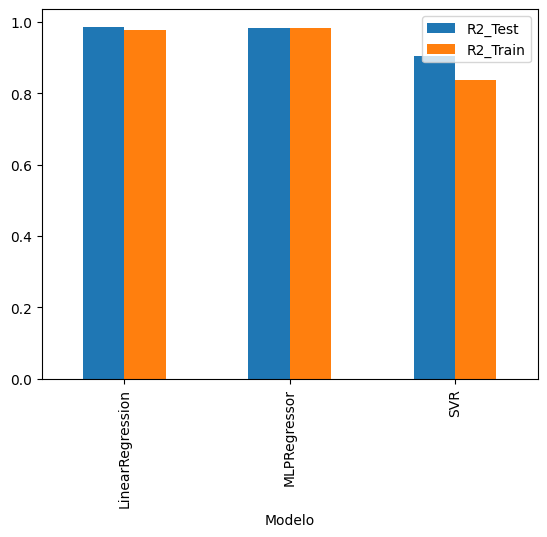

In [ ]:
graficoResultados = resultados.sort_values(by='R2_Test', ascending=False).set_index('Modelo')
graficoResultados[['R2_Test', 'R2_Train']].plot(kind='bar')

### Métrica MSE

<Axes: xlabel='Modelo'>

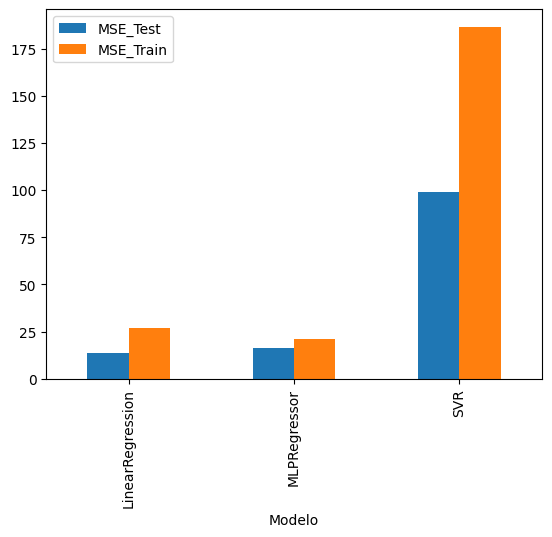

In [ ]:
graficoResultados = resultados.sort_values(by='MSE_Test').set_index('Modelo')
graficoResultados[['MSE_Test', 'MSE_Train']].plot(kind='bar')

### Métrica MAE

<Axes: xlabel='Modelo'>

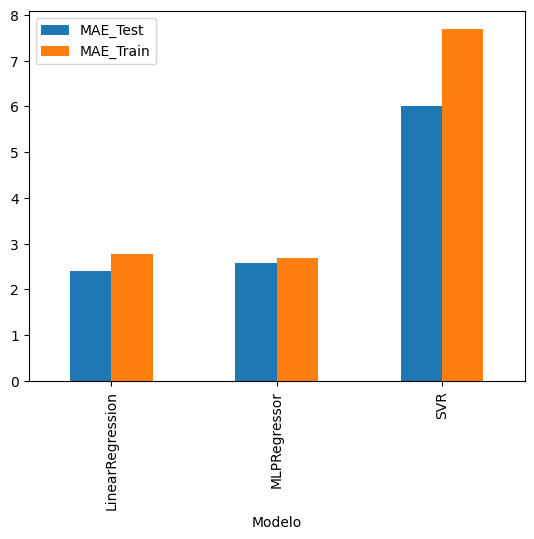

In [ ]:
graficoResultados = resultados.sort_values(by='MAE_Test').set_index('Modelo')
graficoResultados[['MAE_Test', 'MAE_Train']].plot(kind='bar')

## Gráfico dos Resultados do Melhor Modelo

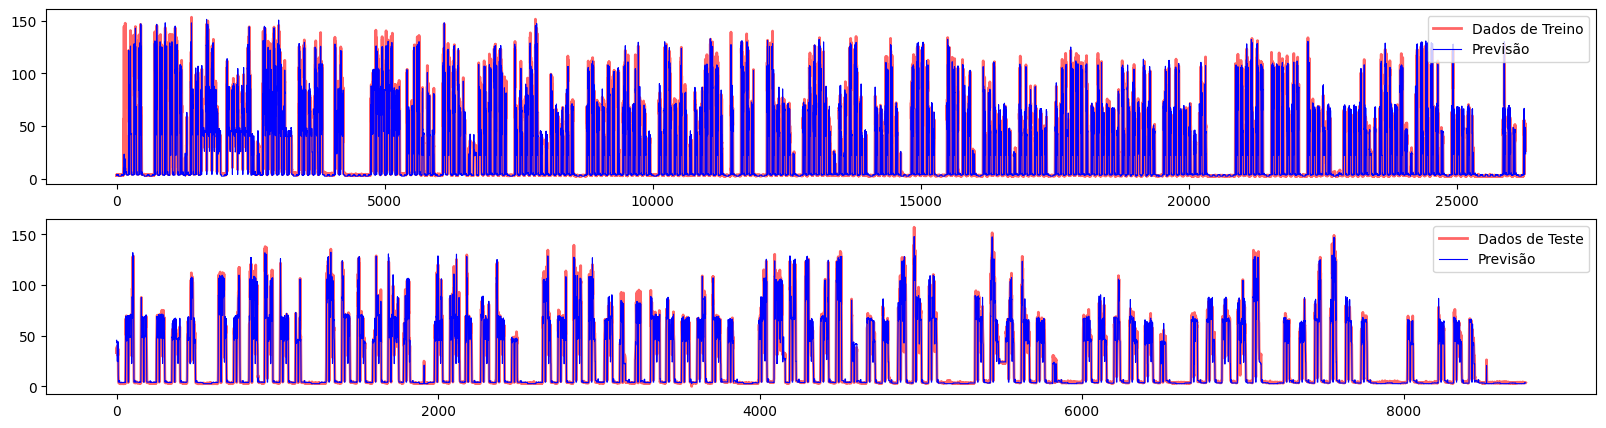

In [ ]:
idx_modelo_escolhido = 0

y_train_pred = modelos[idx_modelo_escolhido].predict(x_train)
y_test_pred = modelos[idx_modelo_escolhido].predict(x_test)

hor_size = 20
ver_size = 5
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(hor_size, ver_size))
axes[0].plot(y_train, color = 'red', linewidth=2.0, alpha = 0.6)
axes[0].plot(y_train_pred, color = 'blue', linewidth=0.8)
axes[1].plot(y_test, color = 'red', linewidth=2.0, alpha = 0.6)
axes[1].plot(y_test_pred, color = 'blue', linewidth=0.8)

axes[0].legend(['Dados de Treino', 'Previsão'])
axes[1].legend(['Dados de Teste', 'Previsão'])